In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error , confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score , StratifiedKFold
from sklearn.metrics import mean_squared_error

## Cancer breast dataset analysis

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import pandas as pd
plt.rcParams['figure.figsize'] = [10, 6]  # Width, Height in inches
sns.set_context("notebook", rc={"figure.figsize": (10, 6)})

# Load the Breast Cancer dataset
cancer = load_breast_cancer() 

In [3]:
df_cancer = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df_cancer['target'] = cancer.target


In [4]:
df_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [5]:
df_cancer.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [6]:
df_cancer.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [7]:
def plot_scatter(data,x,y,text, **kwargs):
    sns.scatterplot(data=data, x=x, y=y, cmap='viridis', edgecolor='k', s=100, hue="target")
    if text is not None:
        plt.title(text)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.show()


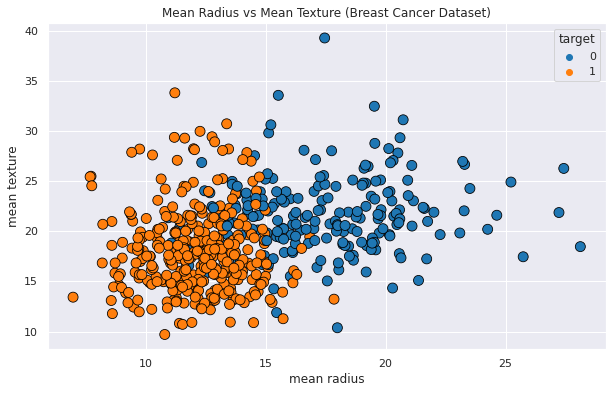

In [8]:
plot_scatter(df_cancer,"mean radius","mean texture", "Mean Radius vs Mean Texture (Breast Cancer Dataset)")

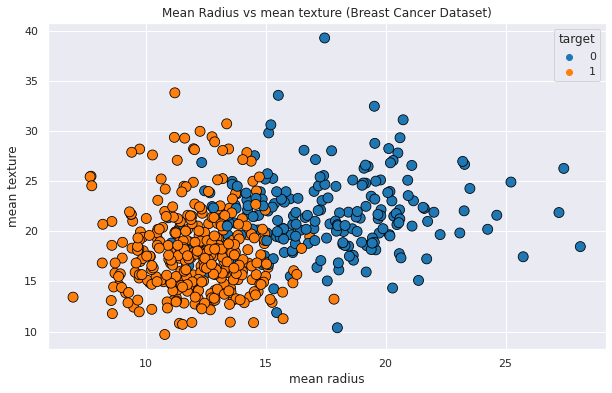

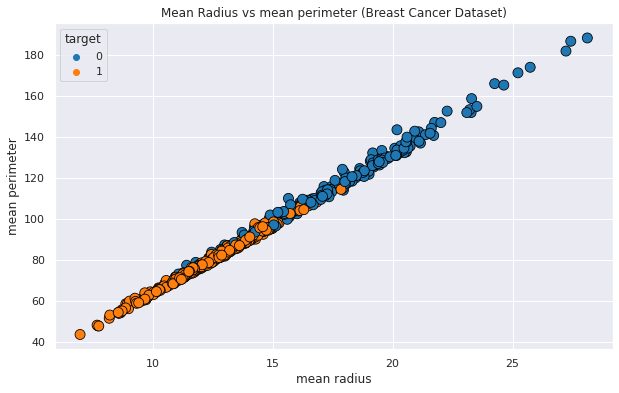

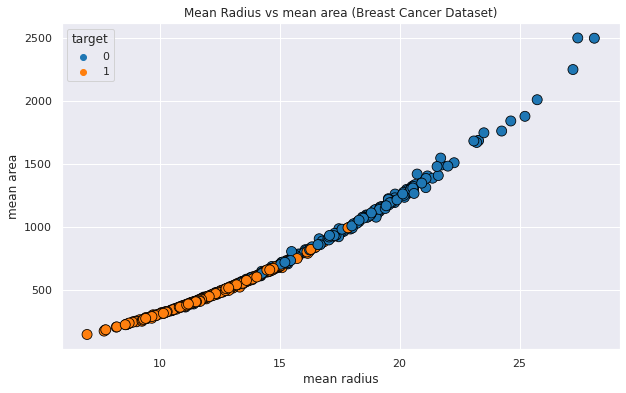

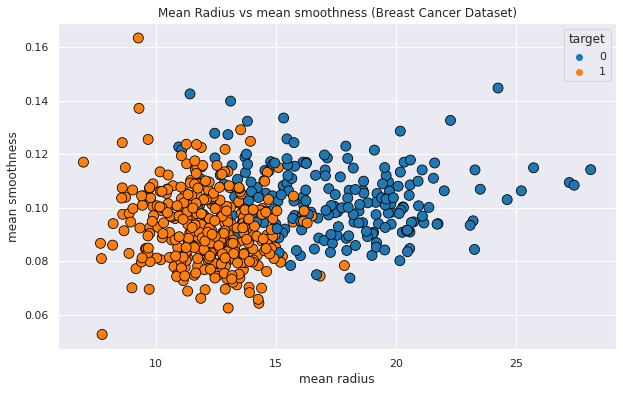

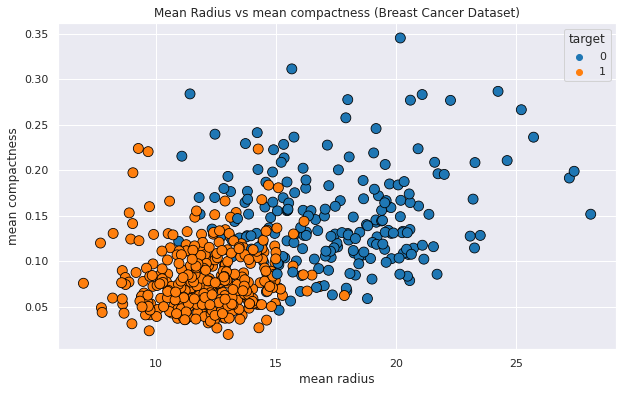

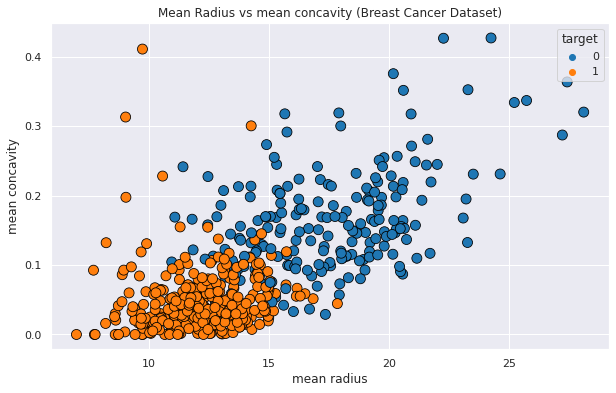

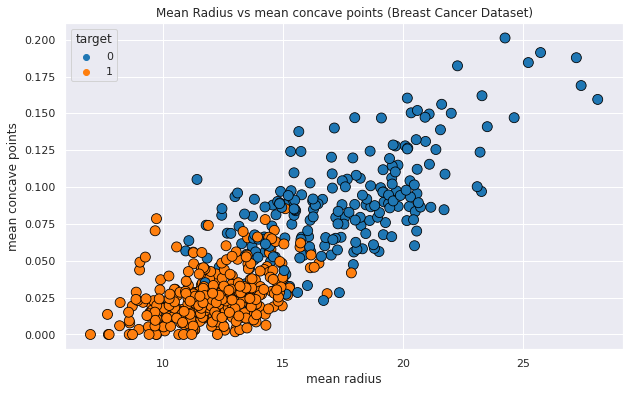

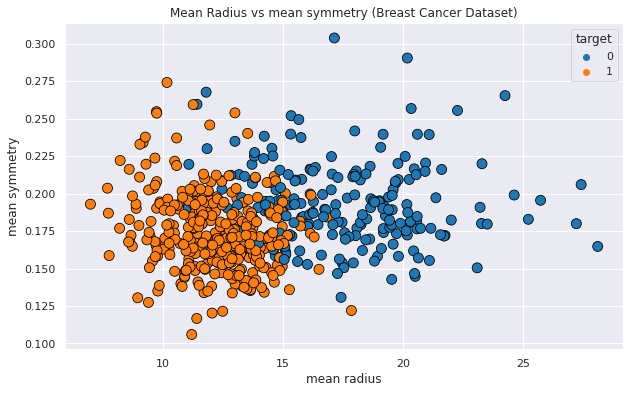

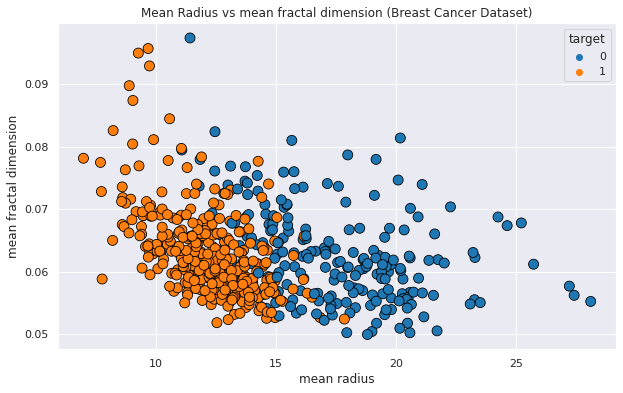

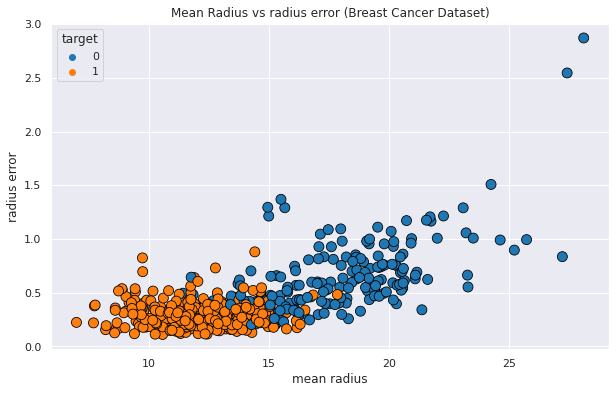

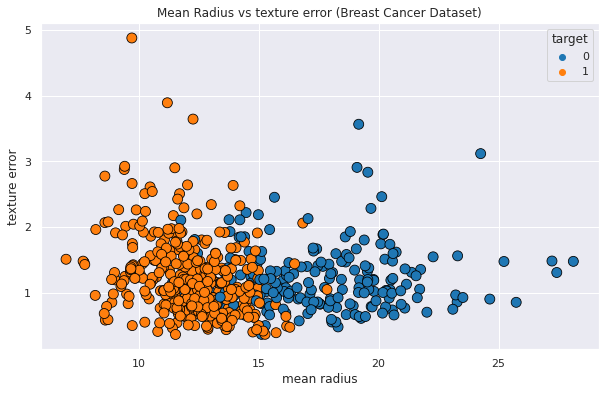

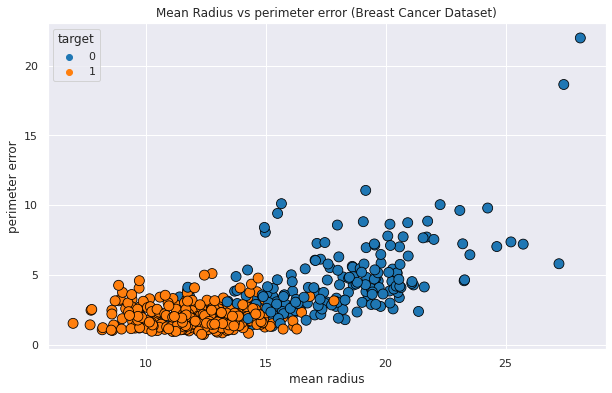

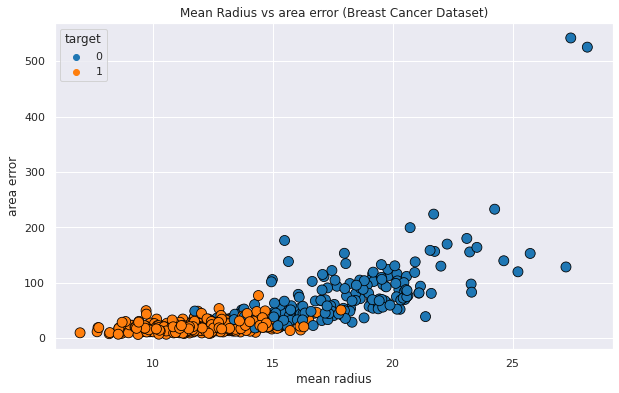

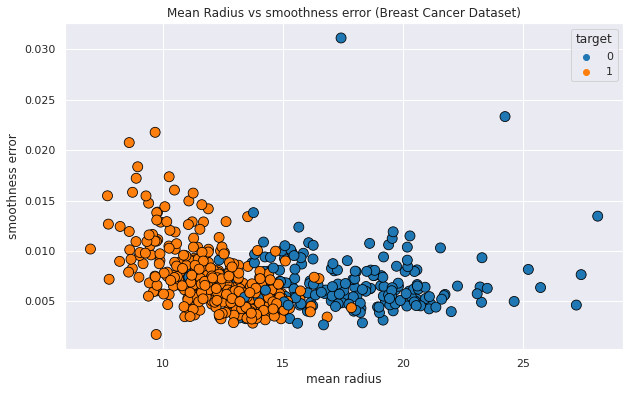

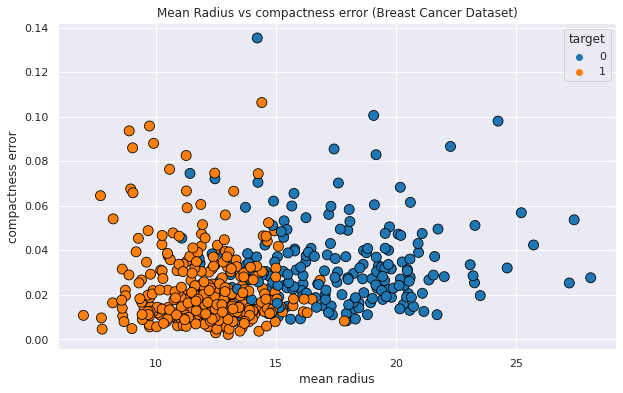

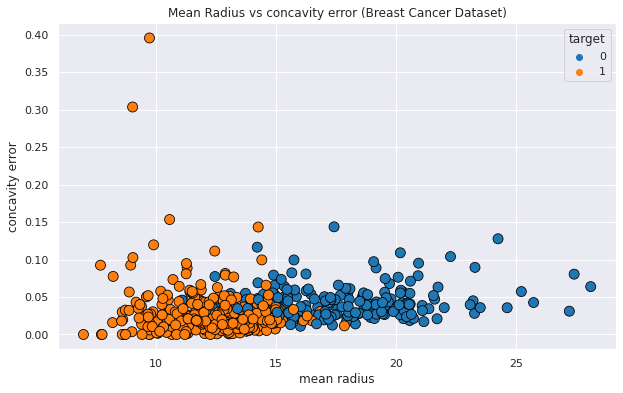

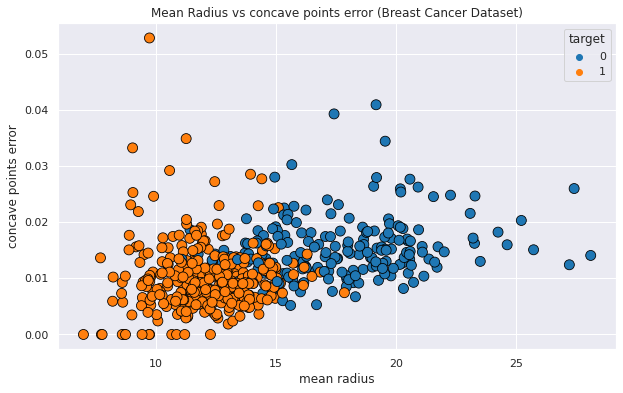

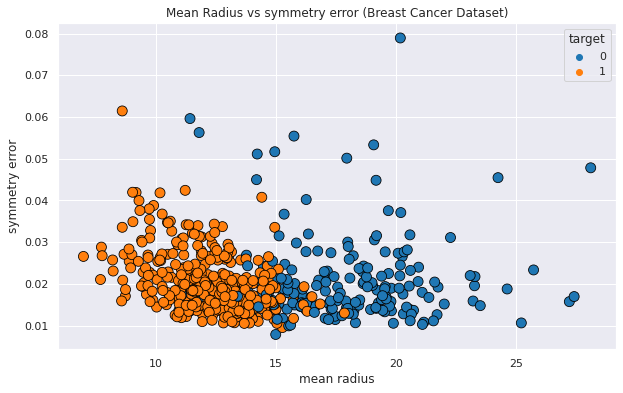

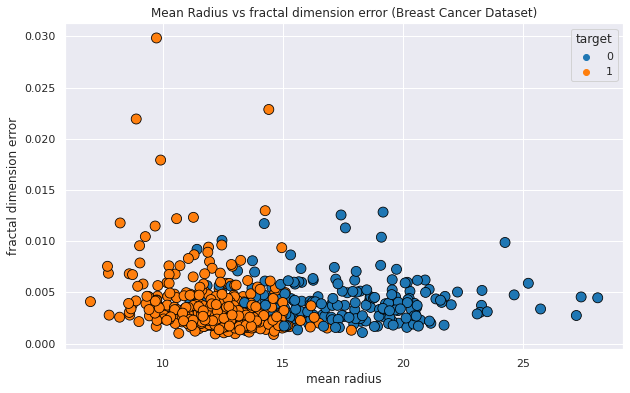

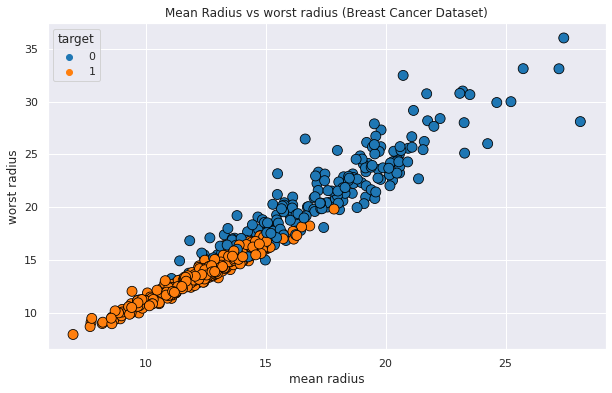

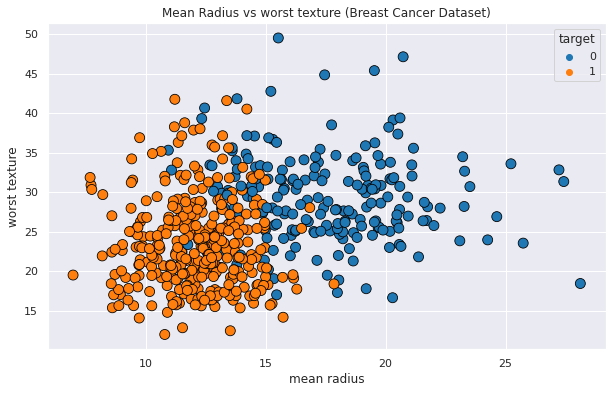

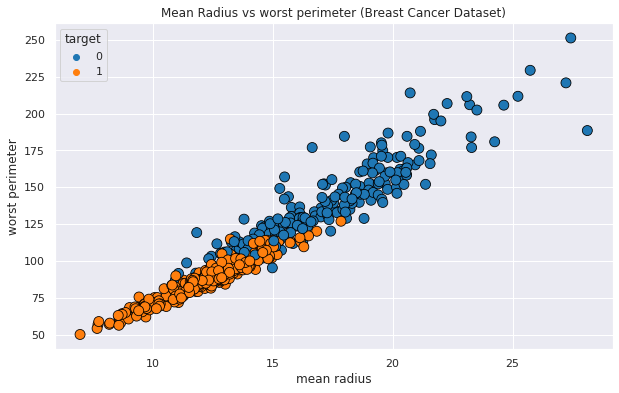

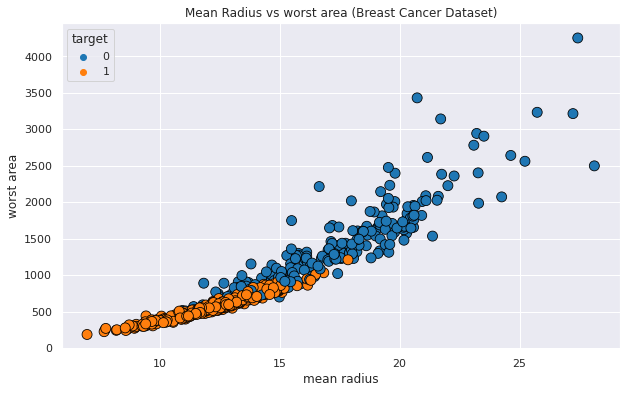

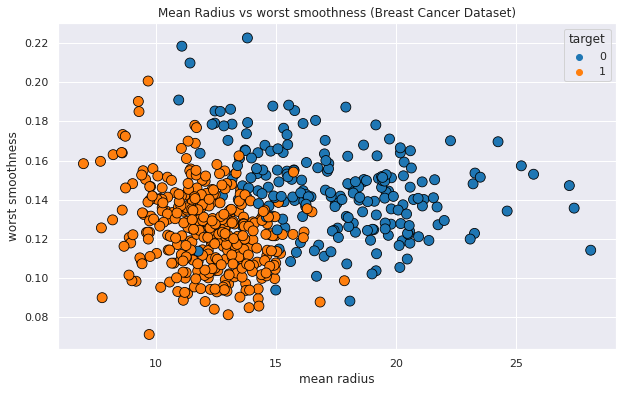

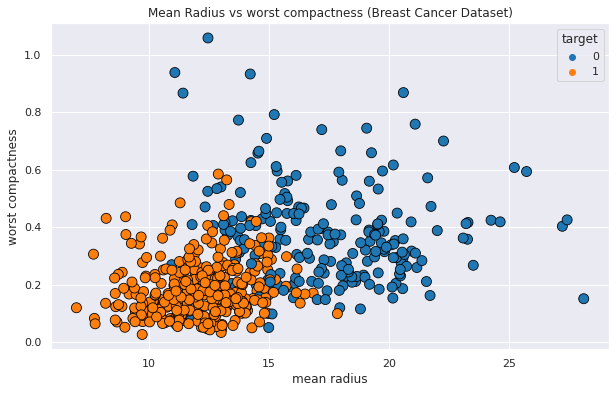

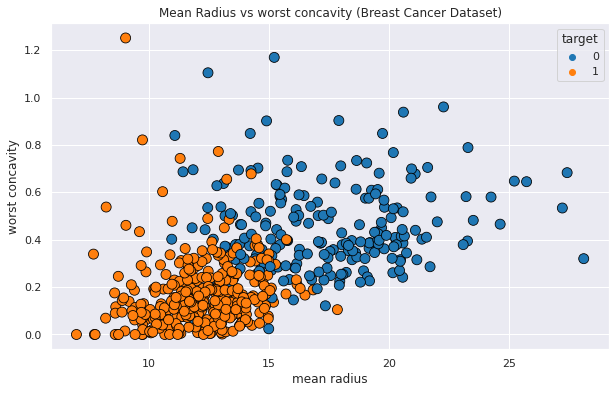

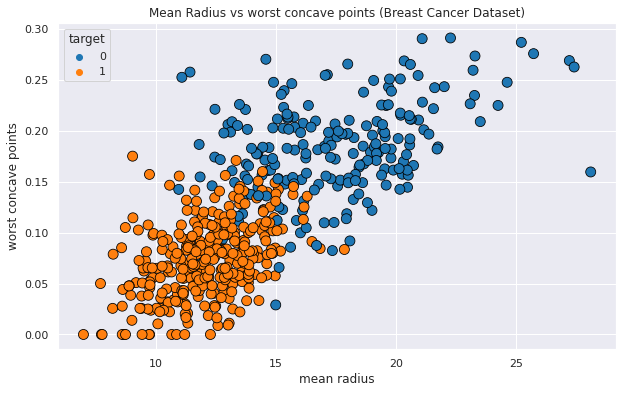

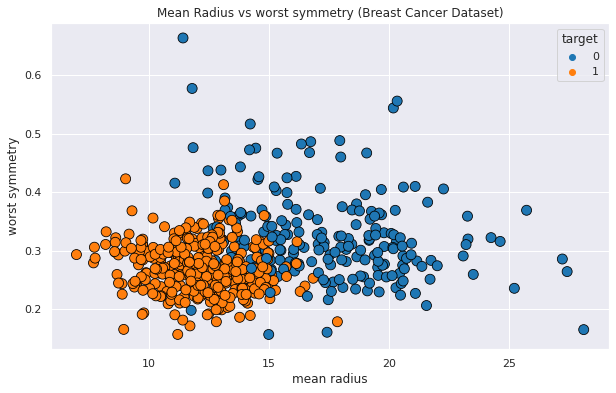

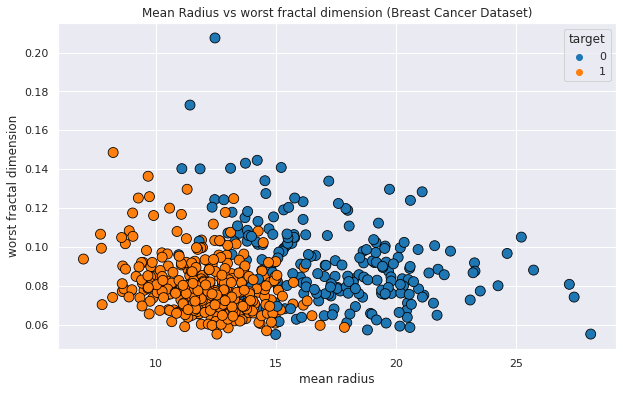

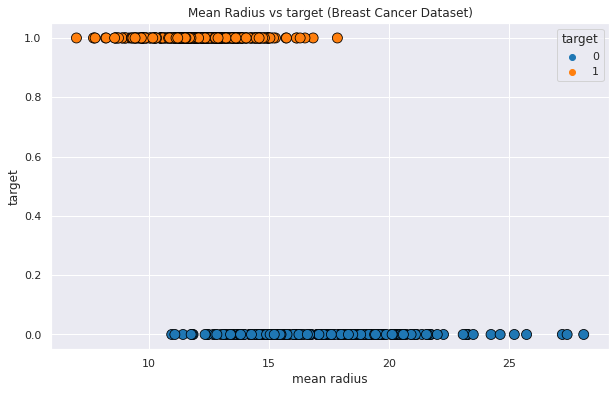

In [9]:
for feature in df_cancer.columns:
    if feature != 'mean radius':
        plot_scatter(df_cancer, "mean radius", feature, f"Mean Radius vs {feature} (Breast Cancer Dataset)")

## Let us try to use SVM to trace the the boundaries: mean radius","mean texture

In [10]:
# X_radius = cancer.data[:, :2]
X_radius = cancer.data[:, [0,20]]
y = cancer.target

In [11]:
model = SVC(kernel='linear', C= 1.0, gamma='scale')

In [12]:
model.fit(X_radius,y)

SVC(kernel='linear')

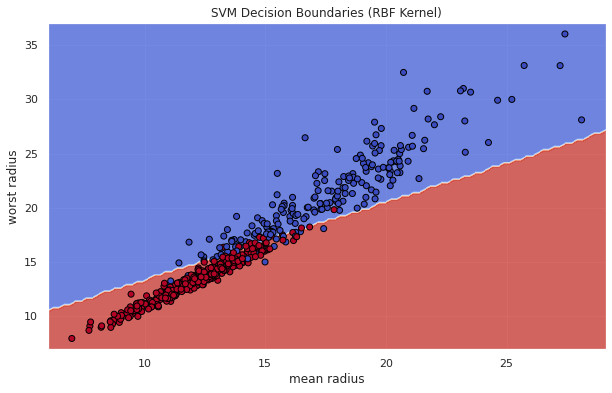

In [13]:
# this code can be reused 
# Create a meshgrid to plot decision boundaries
xx, yy = np.meshgrid(np.linspace(X_radius[:, 0].min() - 1, X_radius[:, 0].max() + 1, 100),
                     np.linspace(X_radius[:, 1].min() - 1, X_radius[:, 1].max() + 1, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries and data points
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_radius[:, 0], X_radius[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('SVM Decision Boundaries (RBF Kernel)')
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[20])
plt.show()

# Second methode using seaborn

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data[:, [0, 20]]  # Use 'mean radius' and 'worst radius'
y = cancer.target


# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [15]:
# Train an SVM model with a linear kernel
model = SVC(kernel='linear', C=1.0)
model.fit(X_std, y)

SVC(kernel='linear')

In [16]:
y_pred = model.predict(X_std)

In [17]:
score = accuracy_score(y, y_pred)
print(f'Accuracy: {score*100:.2f}%')

Accuracy: 92.27%


In [18]:
#By hand 
def custom_accuracy(y_true, y_pred):
    correct = sum(y_true == y_pred)
    total = len(y_true)
    return correct / total
score = custom_accuracy(y, y_pred)
print(f'Accuracy: {score*100:.2f}%')

Accuracy: 92.27%


In [19]:
misclassified = (y != y_pred).sum()
print(f"Number of misclassified point: {misclassified}")

Number of misclassified point: 44


Text(0, 0.5, 'worst radius (standardized)')

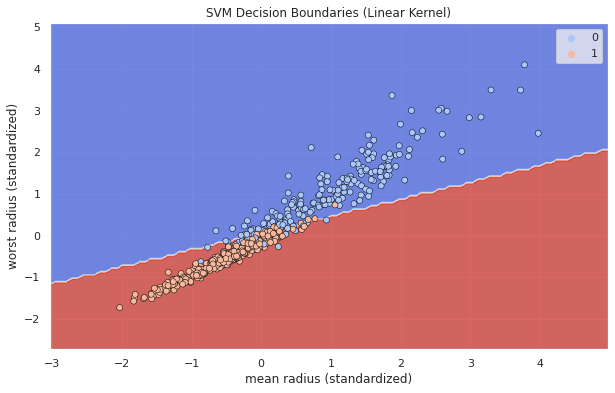

In [20]:
# Create a meshgrid to plot decision boundaries
xx, yy = np.meshgrid(np.linspace(X_std[:, 0].min() - 1, X_std[:, 0].max() + 1, 100),
                     np.linspace(X_std[:, 1].min() - 1, X_std[:, 1].max() + 1, 100))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries and data points using Seaborn
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Use seaborn to plot the scatterplot
sns.scatterplot(x=X_std[:, 0], y=X_std[:, 1], hue=y, palette='coolwarm', edgecolor='k')

plt.title('SVM Decision Boundaries (Linear Kernel)')
plt.xlabel('mean radius (standardized)')
plt.ylabel('worst radius (standardized)')

In [21]:
cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df["target"] = cancer.target

In [22]:
df_f =  df[['mean radius', 'mean texture']]

In [35]:
best_score = 0
best_pair = None

features = df.columns[:-1] # exclude target :)
for i, feature1 in enumerate(features):
    for j, feature2 in enumerate(features):
      if i >= j: 
          continue
      X = df[[feature1, feature2]]
      y = cancer.target
      X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
      model = SVC(kernel='rbf', C=1.0)
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      score = custom_accuracy(y_test,y_pred)
      
      if score > best_score:
          best_score = score
          best_pair = (feature1,feature2)
print(f"Best feature pair {best_pair} with accuracy: {best_score: .2f}")
# store feature1 in variable feature1 and feature2 in variable feature2
feature1, feature2 = best_pair
X_best = df[[feature1, feature2]].values

Best feature pair ('worst texture', 'worst perimeter') with accuracy:  0.97


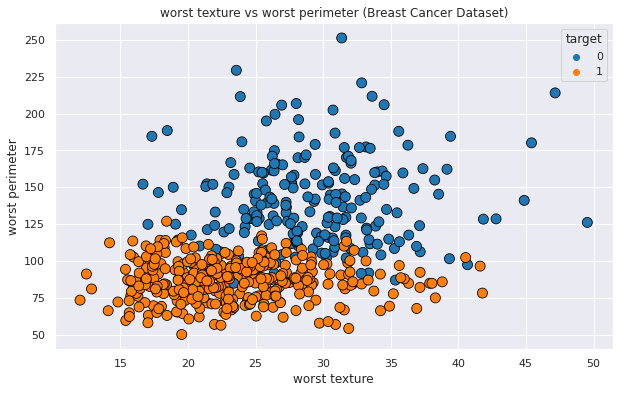

In [36]:
plot_scatter(df, feature1, feature2, f"{feature1} vs {feature2} (Breast Cancer Dataset)")

In [39]:
# Train a linear SVM on the best pair
model = SVC(kernel='rbf')
model.fit(X_best, y)

SVC()

Text(0, 0.5, 'worst perimeter')

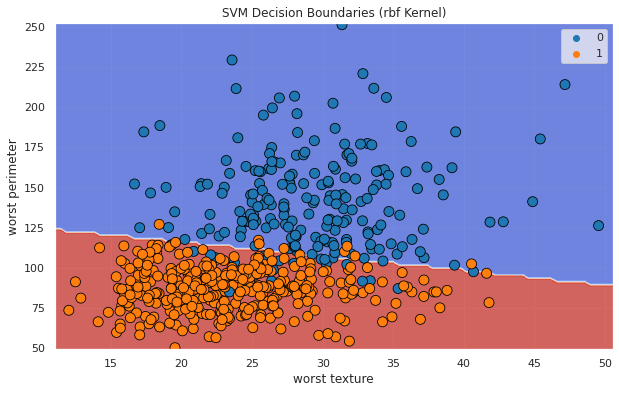

In [47]:
# Create a meshgrid to plot decision boundaries
xx, yy = np.meshgrid(np.linspace(X_best[:, 0].min() - 1, X_best[:, 0].max() + 1, 100),
                     np.linspace(X_best[:, 1].min() - 1, X_best[:, 1].max() + 1, 100))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries and data points using Seaborn
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Use seaborn to plot the scatterplot
sns.scatterplot(x=X_best[:, 0], y=X_best[:, 1], hue=y, cmap='viridis', edgecolor='k', s=100,)
plt.title('SVM Decision Boundaries (rbf Kernel)')
plt.xlabel(feature1)
plt.ylabel(feature2)

# Cross validation evaluation


In [48]:
cancer = load_breast_cancer()

In [49]:
X = cancer.data
y = cancer.target

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.3)

In [57]:
C = 1.0
models = {
    'SVM Linear': svm.SVC(kernel='linear', C=C),
    'SVM RBF': svm.SVC(kernel='rbf', gamma=0.7, C=C),
    'SVM Poly': svm.SVC(kernel='poly', degree=3, C=C)
}


In [59]:

accuracies= {name: [] for name in models} # store the accuracies
for name, model in models.items(): # to handle each model accordingly
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    accuracies[name].append(accuracy)
    print(f'{name} accuracy: {accuracy:.4f}')  # print the accuracy

SVM Linear accuracy: 0.9591
SVM RBF accuracy: 0.6316
SVM Poly accuracy: 0.9181


In [60]:
# Evaluate using cross-validation
kf = StratifiedKFold (n_splits =10 , shuffle = True , random_state =42)
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kf)
    print(f'{name} cross-validation accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})')

SVM Linear cross-validation accuracy: 0.9561 (+/- 0.0179)
SVM RBF cross-validation accuracy: 0.6274 (+/- 0.0070)
SVM Poly cross-validation accuracy: 0.9122 (+/- 0.0376)
